In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dangjin_fcst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/당진/dangjin_fcst_data.csv')
dangjin_fcst


,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [ ]:
#예보 시간 컬럼의 데이터 타입을 datetime으로 변경합니다.
dangjin_fcst['Forecast_time'] = pd.to_datetime(dangjin_fcst['Forecast time'])


In [ ]:
# 기상청에서는 하루 3시간 간격으로 8회 예보합니다.
# 여기서는 14시 예보만을 사용하였습니다.
fcst_14 = dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==14]

In [ ]:
#다음 날의 기상 예보가 필요하여 예보시간 기준 10시간 후(00:00)부터 33시간 후(23:00) 데이터만 사용합니다.

fcst_14 = fcst_14[(fcst_14['forecast']>=10)&(fcst_14['forecast']<=33)]

In [ ]:
#예보 시점에 focast를 더하여 예보 시각을 구합니다.

def to_date(x):
    return pd.DateOffset(hours=x)

fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [ ]:
fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
fcst_14


,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
20,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
21,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
22,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
23,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
24,2018-03-02 06:00:00,-5.0,60.0,4.3,344.0,1.0
...,...,...,...,...,...,...
162094,2021-03-02 12:00:00,4.0,50.0,5.8,344.0,1.0
162095,2021-03-02 15:00:00,5.0,50.0,5.9,333.0,1.0
162096,2021-03-02 18:00:00,3.0,60.0,4.1,311.0,1.0
162097,2021-03-02 21:00:00,1.0,80.0,1.7,329.0,1.0


In [ ]:
#태양광 발전량 예측은 1시간 간격으로 해야하나 예보는 3시간 간격으로 나옵니다.
# knn & 선형회귀

fcst_14_ = pd.DataFrame()
fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

In [ ]:
fcst_14_

,Forecast_time
0,2018-03-02 00:00:00
1,2018-03-02 01:00:00
2,2018-03-02 02:00:00
3,2018-03-02 03:00:00
4,2018-03-02 04:00:00
...,...
26299,2021-03-01 19:00:00
26300,2021-03-01 20:00:00
26301,2021-03-01 21:00:00
26302,2021-03-01 22:00:00


In [ ]:
fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')

In [ ]:
fcst_14_

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
38355,2021-03-02 12:00:00,4.0,50.0,5.8,344.0,1.0
38356,2021-03-02 15:00:00,5.0,50.0,5.9,333.0,1.0
38357,2021-03-02 18:00:00,3.0,60.0,4.1,311.0,1.0
38358,2021-03-02 21:00:00,1.0,80.0,1.7,329.0,1.0


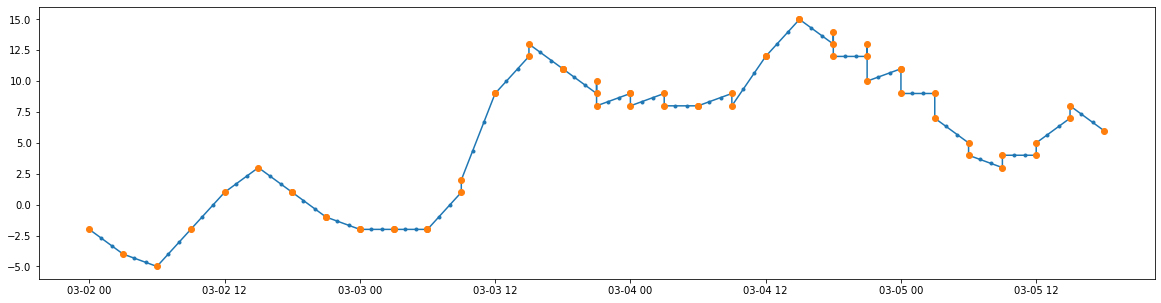

In [ ]:
inter_fcst_14 = fcst_14_.interpolate()
inter_fcst_14
plt.figure(figsize=(20,5))
days = 5
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Temperature'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Temperature'], 'o')